# Hypotheses
+ LSTM will outperform RNN in predicting AAPL close price due to its ability to learn long-term dependencies and handle vanishing gradients more effectively.

+ Hyperparameter optimization using Keras tuner will improve the accuracy of the model in predicting AAPL close price compared to using default hyperparameters.

+ Adding more historical data to the training set will improve the accuracy of the LSTM and RNN models in predicting AAPL close price

In [1]:
# import dependencies
!pip install yfinance
!pip install keras_tuner
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# web scraping and web API

## Scraping

Scraping www.marketwatch.com 

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
# Make a request to the website
url = 'https://www.marketwatch.com/investing/stock/aapl/download-data?mod=mw_quote_tab'

response = requests.get(url)

In [4]:
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table with 'class': 'table table--overflow align--center' as there are multiple tables and extract its rows and columns
table = soup.find('table', {'class': 'table table--overflow align--center'})
headers = [th.text.strip() for th in table.select('thead th')]
rows = [[td.text.strip() for td in row.find_all('td')] for row in table.select('tbody tr')]

In [5]:
# Convert the data into a Pandas DataFrame
aapl0 = pd.DataFrame(rows, columns=headers)

# Print the DataFrame
print(aapl0)

                Date\nDate     Open     High      Low    Close      Volume
0   05/02/2023\n05/02/2023  $170.09  $170.35  $167.54  $168.54  48,425,699
1   05/01/2023\n05/01/2023  $169.28  $170.45  $168.64  $169.59  52,472,941
2   04/28/2023\n04/28/2023  $168.49  $169.85  $167.88  $169.68  55,275,848
3   04/27/2023\n04/27/2023  $165.19  $168.56  $165.19  $168.41  64,902,328
4   04/26/2023\n04/26/2023  $163.06  $165.28  $162.80  $163.76  45,498,801
5   04/25/2023\n04/25/2023  $165.19  $166.31  $163.73  $163.77  48,714,059
6   04/24/2023\n04/24/2023  $165.00  $165.60  $163.89  $165.33  41,949,578
7   04/21/2023\n04/21/2023  $165.05  $166.45  $164.49  $165.02  58,337,340
8   04/20/2023\n04/20/2023  $166.09  $167.87  $165.56  $166.65  52,456,379
9   04/19/2023\n04/19/2023  $165.80  $168.16  $165.54  $167.63  47,720,168
10  04/18/2023\n04/18/2023  $166.10  $167.41  $165.65  $166.47  49,923,008
11  04/17/2023\n04/17/2023  $165.09  $165.39  $164.03  $165.23  41,516,219
12  04/14/2023\n04/14/202

In [6]:
# correct the date format
aapl0['Date'] = pd.to_datetime(aapl0['Date\nDate'].str.split('\n', expand=True)[0])

In [7]:
# remove 'Date\nDate'
aapl0.drop('Date\nDate', axis =1, inplace = True)

In [8]:
# set the date column to index
aapl0.set_index("Date", inplace = True)

In [9]:
# parse Close price as float
aapl0['Close'] = aapl0['Close'].str.replace('[^\d.]', '').astype(float)

## API

Requesting data from Yahoo Finance separately for two periods so I can merge them to demonstrate my pandas skills

In [10]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Define the time periods
start1 = "2016-01-01"
end1 = "2018-12-31"
start2 = "2019-01-01"
end2 = datetime.today() - timedelta(days=len(aapl0)) # data prior to aapl0

In [11]:
# Download the AAPL data for the first period
aapl1 = yf.download("AAPL", start=start1, end=end1)

aapl1.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.074739,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.471447,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.012115,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.040894,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.157446,283192000


In [12]:
# Download the AAPL data for the second period
aapl2 = yf.download("AAPL", start=start2, end=end2)

aapl2.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.047050,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.257278,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.719700,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.640190,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.319607,164101200


# Data preparation 

In [13]:
# Merge the two datasets into a single DataFrame
df = pd.concat([aapl1, aapl2, aapl0])

# Print the first 5 rows of the merged DataFrame
print(df.head())


                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2016-01-04    25.6525  26.342501       25.5  26.337500  24.074739  270597600
2016-01-05    26.4375    26.4625  25.602501  25.677500  23.471447  223164000
2016-01-06  25.139999  25.592501  24.967501  25.174999  23.012115  273829600
2016-01-07      24.67  25.032499    24.1075  24.112499  22.040894  324377600
2016-01-08  24.637501    24.7775  24.190001  24.240000  22.157446  283192000


In [14]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-11,$162.35,$162.36,$160.51,160.80,NaN,"47,644,219"
2023-04-10,$161.42,$162.03,$160.08,162.03,NaN,"47,716,879"
2023-04-06,$162.43,$164.96,$162.00,164.66,NaN,"45,390,121"
2023-04-05,$164.74,$165.05,$161.80,163.76,NaN,"51,511,738"
2023-04-04,$166.60,$166.84,$165.11,165.63,NaN,"46,278,301"


In [15]:
# check for missing values (if any)
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close    20
Volume        0
dtype: int64

Adj Close is not our concern so we can leave it the rest of the columns do not have missing values

In [16]:
# check summary statistics
df.describe()

,Close,Adj Close
count,1850.000000,1830.000000
mean,82.754489,80.305351
std,50.754785,50.707924
min,22.584999,20.883030
25%,39.731250,37.659888
50%,55.836250,53.504892
75%,134.869995,132.343624
max,182.009995,180.683868


As we aim to analyze the close price

In [17]:
close = df['Close']
close.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

In [18]:
# construct features in terms of Date, Month, and Year
close  = close.reset_index()
close['day'] = close['Date'].dt.day
close['month'] = close['Date'].dt.month
close['year'] = close['Date'].dt.year
close.set_index('Date', inplace = True)

In [19]:
# again check data
close.tail()

,Close,day,month,year
Date,,,,
2023-04-11,160.80,11,4,2023
2023-04-10,162.03,10,4,2023
2023-04-06,164.66,6,4,2023
2023-04-05,163.76,5,4,2023
2023-04-04,165.63,4,4,2023


# Database

# EDA

Text(0, 0.5, 'Price')

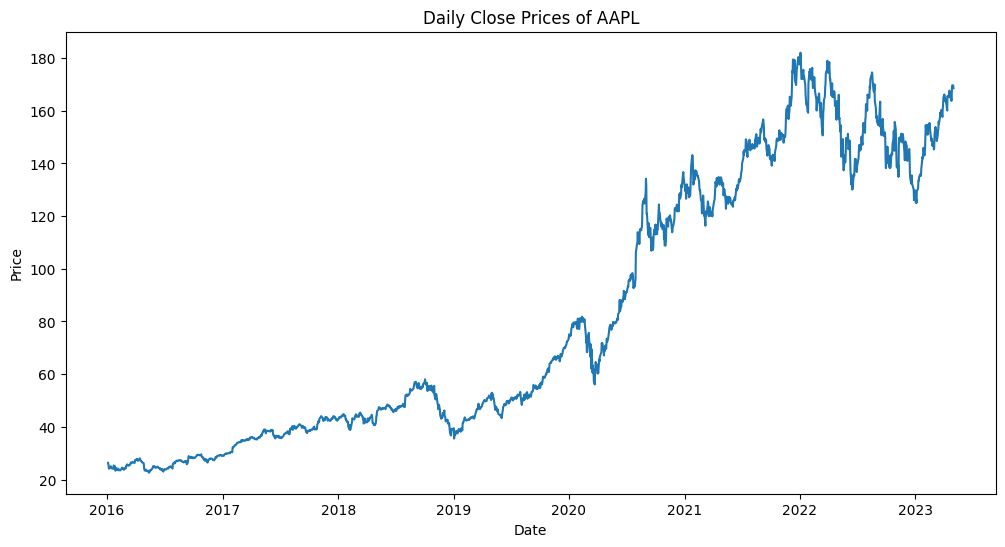

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Resample the daily close prices to monthly frequency
monthly_close = close.resample('M').mean()

# Create a line plot of the daily close prices
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=close['Close'], ax=ax)
ax.set_title('Daily Close Prices of AAPL')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

The timeseries plot of AAPL close price suggest a definite upward trend.

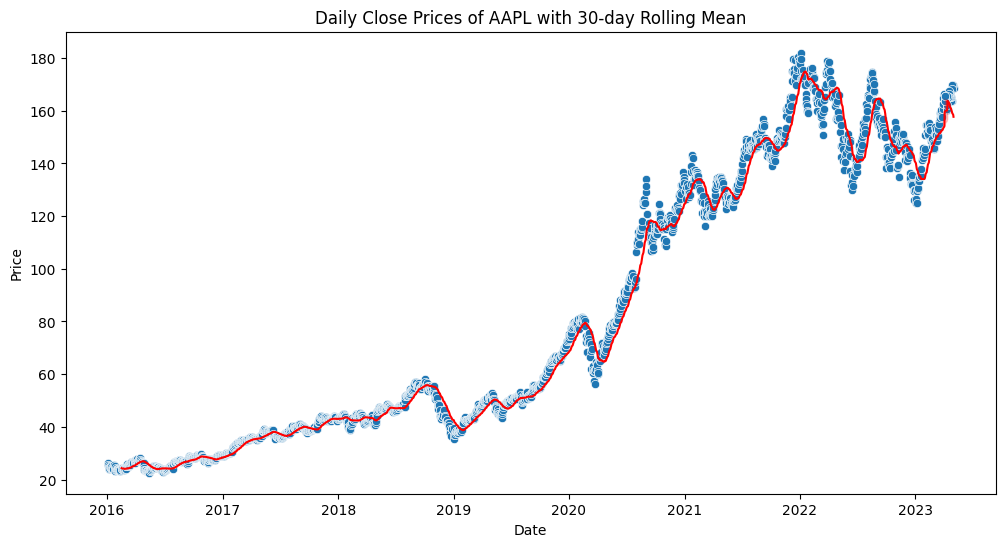

In [21]:
# Create a scatter plot of the daily close prices with a rolling mean
rolling_mean = close['Close'].rolling(window=30).mean()
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=close['Close'], ax=ax)
sns.lineplot(data=rolling_mean, ax=ax, color='red')
ax.set_title('Daily Close Prices of AAPL with 30-day Rolling Mean')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()

The 30-day rolling average also confirming an upward trend in the close price of AAPL

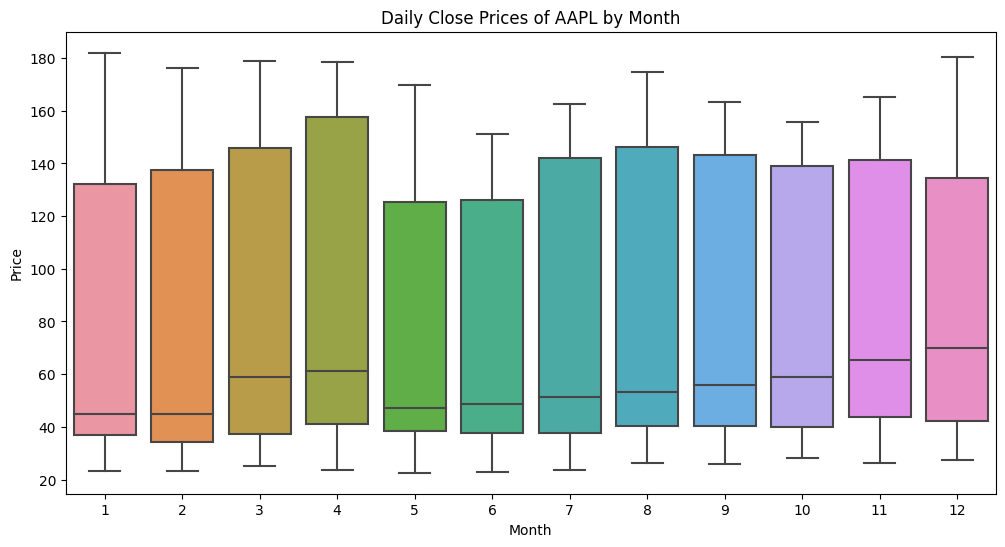

In [22]:
# Create a box plot of the daily close prices by month
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='month', y='Close', data=close, ax=ax)
ax.set_title('Daily Close Prices of AAPL by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Price')

plt.show()

If we inspect the data of close price by month, so we can see thar the medians for all the months is almost same. Though April and December have the highest median which suggests that the close price of AAPL remained highest in December and April. Apart from that, there are no outliers in the monthly data.

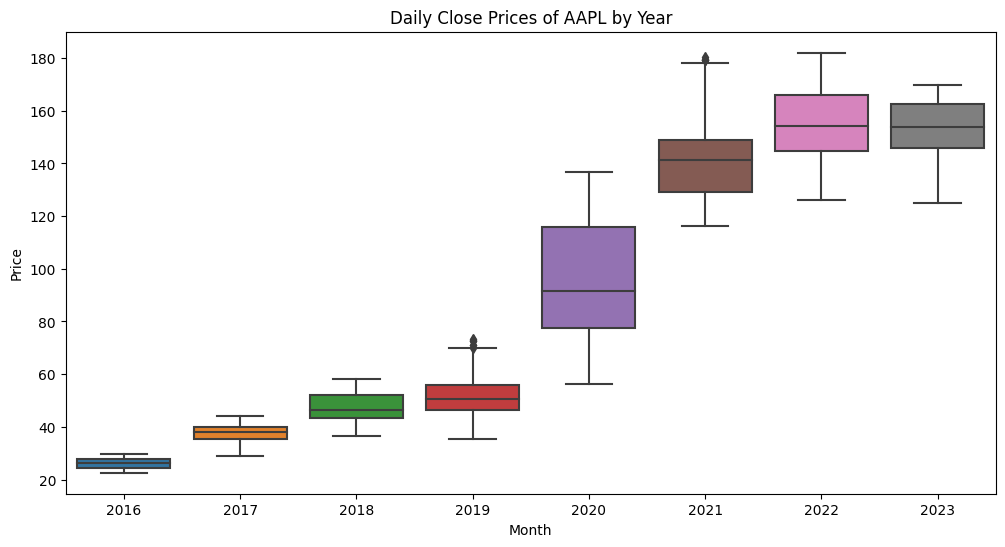

In [23]:
# Create a box plot of the daily close prices by month
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='year', y='Close', data=close, ax=ax)
ax.set_title('Daily Close Prices of AAPL by Year')
ax.set_xlabel('Month')
ax.set_ylabel('Price')

plt.show()

The yearly plot shows a definite yearly increas. Apart from that, there are outliers in year 2019 and 2021 which may be due to the COVID 19.

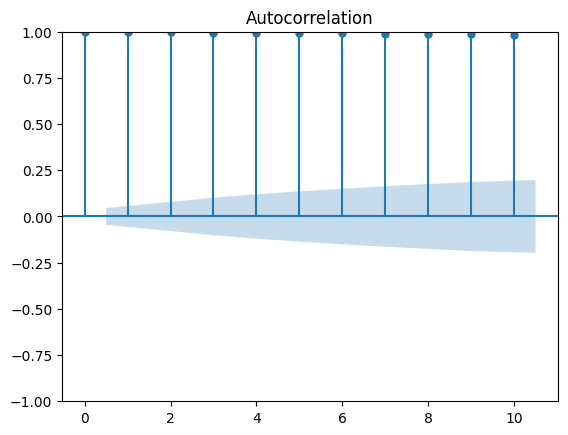

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# plot ACF
plot_acf(close['Close'], lags=10)
# show the plot
plt.show()


The ACF plot shows significant lags until lag 10 and even onwards which again is a clear hint towards non stationarity of the data

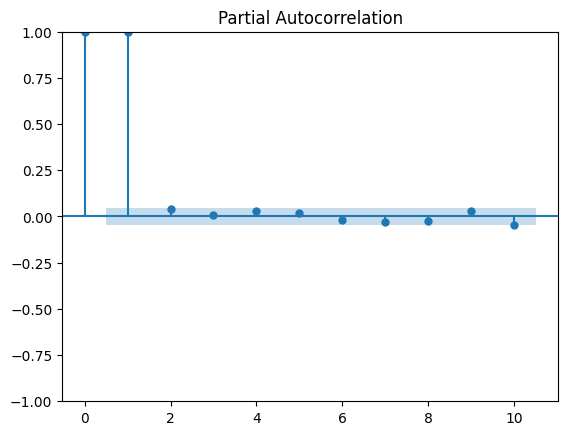

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# plot PACF
plot_pacf(close['Close'], lags=10)

# show the plot
plt.show()


The PACF also shows 1 significant lag showing dependence on lagged price.

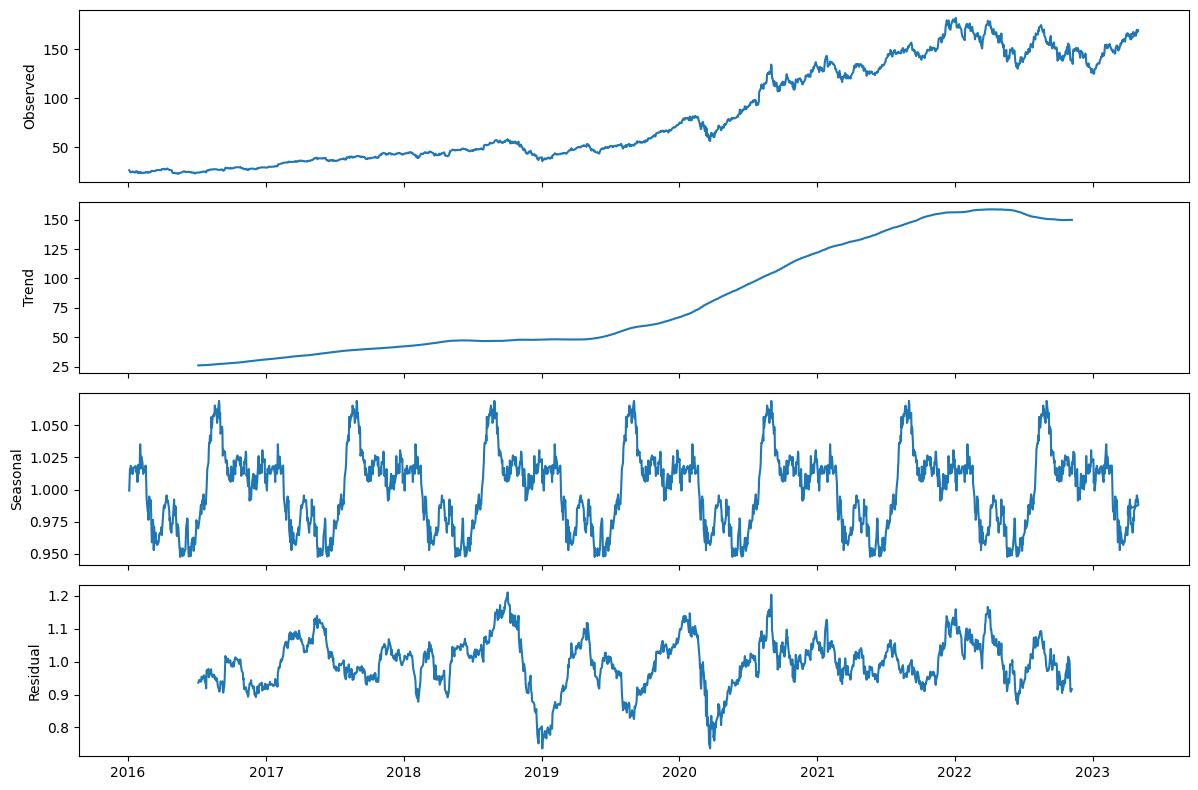

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform time series decomposition on Close price
decomposition = seasonal_decompose(close['Close'], model='multiplicative', period=252)

# Plot the decomposition results
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12,8))
axes[0].plot(decomposition.observed)
axes[0].set_ylabel('Observed')
axes[1].plot(decomposition.trend)
axes[1].set_ylabel('Trend')
axes[2].plot(decomposition.seasonal)
axes[2].set_ylabel('Seasonal')
axes[3].plot(decomposition.resid)
axes[3].set_ylabel('Residual')
plt.tight_layout()
plt.show()


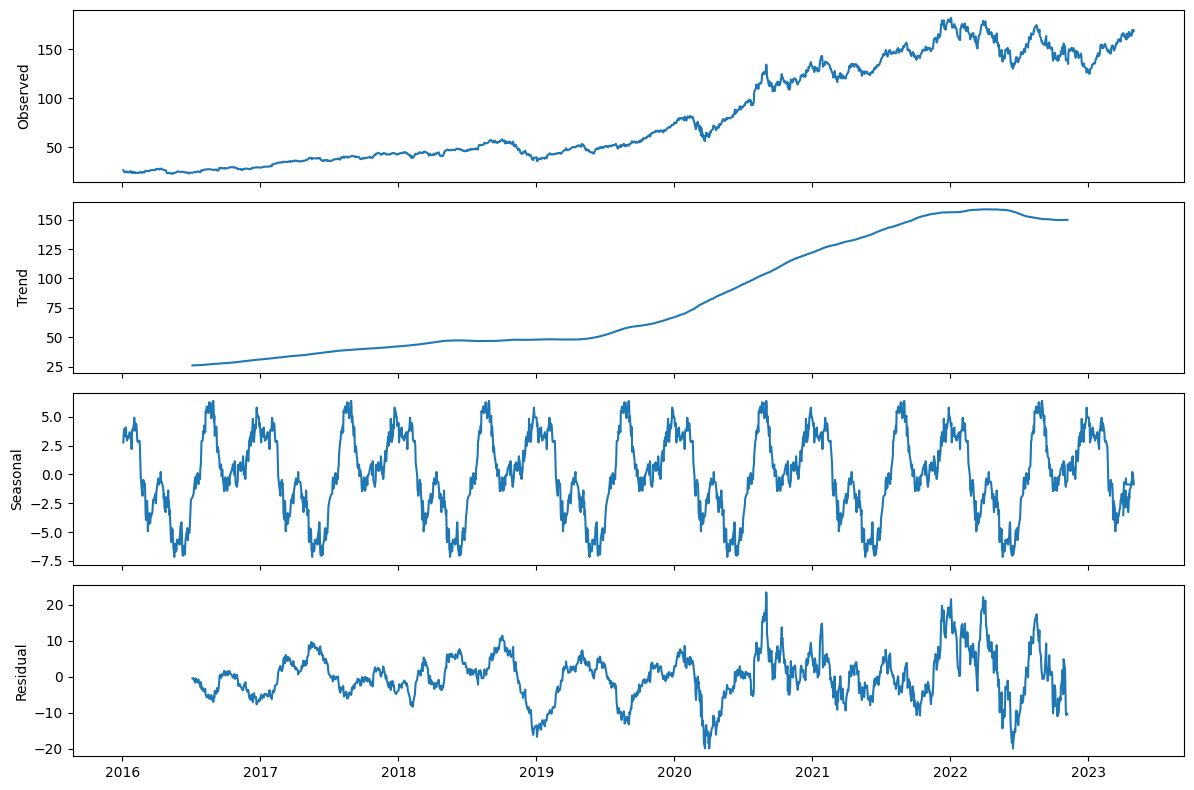

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform time series decomposition on Close price
decomposition = seasonal_decompose(close['Close'], model='additive', period=252)

# Plot the decomposition results
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12,8))
axes[0].plot(decomposition.observed)
axes[0].set_ylabel('Observed')
axes[1].plot(decomposition.trend)
axes[1].set_ylabel('Trend')
axes[2].plot(decomposition.seasonal)
axes[2].set_ylabel('Seasonal')
axes[3].plot(decomposition.resid)
axes[3].set_ylabel('Residual')
plt.tight_layout()
plt.show()


The additive and the multiplicative decomposition plots suggest a clear trend and seasonality in the data

In [28]:
import plotly.express as px
import pandas as pd


# create distribution/density plot using Plotly express
fig = px.histogram(close, x="Close", nbins=10, histnorm='density')

# show the plot
fig.show()


The distribution plot shows that the market remained low for most of the time around 40 to 60 in the initial period and then later on it stayed ona hugher price between 140 to 160 for some time.

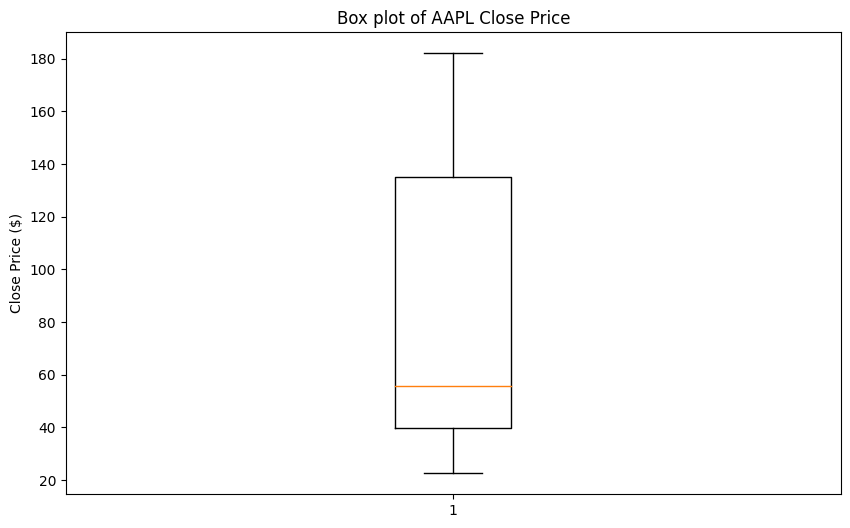

In [29]:
import matplotlib.pyplot as plt


# Create a box plot of the AAPL close price
plt.figure(figsize=(10, 6))
plt.boxplot(close['Close'])
plt.title('Box plot of AAPL Close Price')
plt.ylabel('Close Price ($)')
plt.show()




The box plot suggests that there are no outliers in the close price though the median is concentrated on slightly lower side.

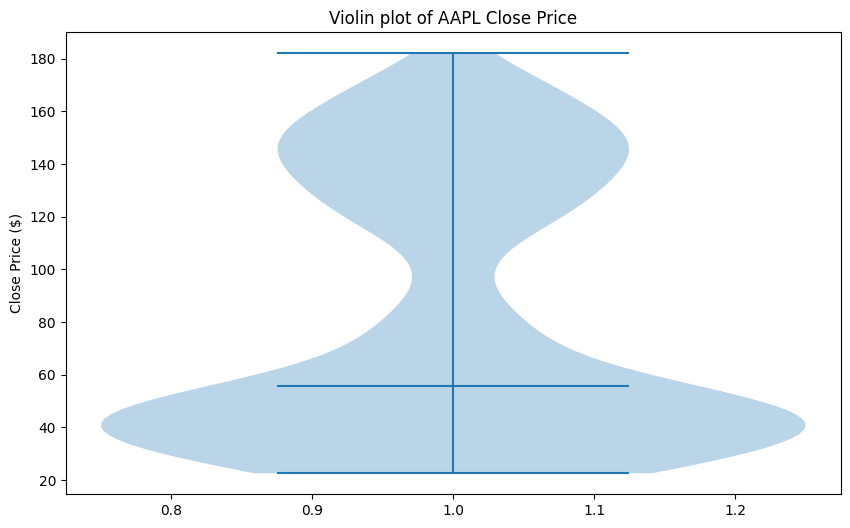

In [30]:
# Create a violin plot of the AAPL close price
plt.figure(figsize=(10, 6))
plt.violinplot(close['Close'], showmedians=True)
plt.title('Violin plot of AAPL Close Price')
plt.ylabel('Close Price ($)')
plt.show()

The violin plot confirms the notion that we established from distribution plot that the market remained low for most of the time (around 40 to 60). 

Also, the other most consistent range is around 140 to 160.

<Axes: ylabel='Date'>

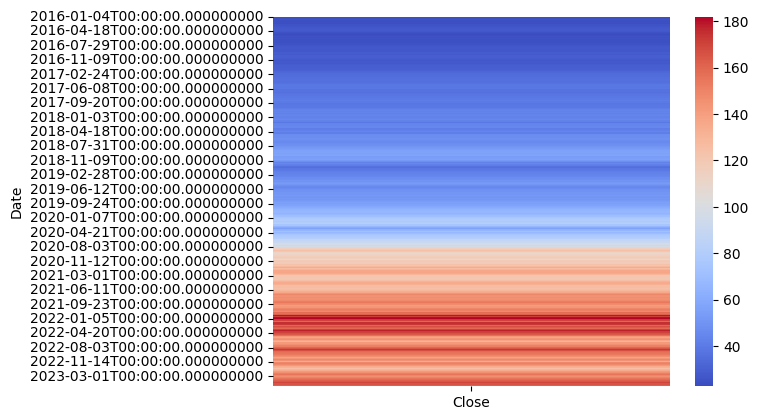

In [31]:
# Create a heatmap of daily Close prices
sns.heatmap(close[['Close']], cmap='coolwarm')

The heatmap shows that the close price is higher towards the end with the highest being in 2022.

# ML framework, predictions and results evaluation with interpretation

## RNN

In [32]:
# import libraries
import numpy as np
import tensorflow
import keras
import keras_tuner as kt
from keras.layers import Dense, Dropout, SimpleRNN
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.models import Sequential

The function **model_builder** is used for hyperparameter tuning of a Simple RNN neural network. It takes in a hp parameter which is an instance of keras-tuner.HyperParameters class.

+ The function first tunes the layer weight initialization by selecting an integer value between 1 to 360 using hp.Int() function. Then, it sets the seed for the random number generator to ensure reproducibility.

+ Next, the function tunes the number of neurons in the input and hidden state by selecting integer values between 7 to 30 for the first hidden state (hp_units_1) and 5 to 25 for the second hidden state (hp_units_2) using hp.Int() function.

+ The function also tunes the drop-out rate using hp.Choice() function which allows selecting one of the predefined values.

+ Then, it tunes the activation function by selecting one of the three activation functions (relu, tanh, selu) using hp.Choice() function.

+ After that, the function constructs the Simple RNN model using the hyperparameters that were tuned in the previous steps. It adds two Simple RNN layers with the number of units and activation functions specified by hp_units_1, hp_units_2 and hp_actv respectively. It also adds a dropout layer with the dropout rate specified by hp_dropout and a dense layer with one output.

+ Then, the function tunes the optimization function by selecting one of the four optimization functions (RMSProp, Adam, SGD, ADAMAX) using hp.Choice() function. It compiles the model with the selected optimization function, loss function (mse), and metric (mse). The function then returns the compiled model.

In [33]:
# function for hyperparameter tuning
def model_builder(hp):
    
    #tune layer weight initialization
    hp_weights = hp.Int('wt', min_value=1, max_value=360, step=1)
    np.random.seed(hp_weights)
    tensorflow.random.set_seed(hp_weights)  
    model = keras.Sequential()
    
    # Tune the number of neurons in the input and hidden state
    hp_units_1 = hp.Int('units1', min_value=7, max_value=30, step = 1)
    hp_units_2 = hp.Int('units2', min_value=5, max_value=25,step=1)
    
    # Tune the drop out rate
    hp_dropout = hp.Choice('do', values=[0.05, 0.1, 0.2, 0.001, 0.0001, 0.00001])
    
    # Tune activation function
    hp_actv = hp.Choice('actv_type', ['relu', 'tanh', 'selu'])
    
    # model
    model.add(SimpleRNN(hp_units_1, activation= hp_actv, return_sequences=True))
    model.add(Dropout(hp_dropout))
    model.add(SimpleRNN(hp_units_2, activation= hp_actv))
    model.add(Dense(1))
    
    # Tune optimization function
    hp_op = hp.Choice('op',['RMSProp', 'Adam', 'SGD', 'ADAMAX'] )
    model.compile(optimizer= hp_op,
                  loss='mse',
                  metrics='mse')

    return model

The function **model** defines a model that is built using the best hyperparameters found during the tuning process. It sets the weights initialization seed to the best value obtained during hyperparameter tuning. It then builds a Sequential model with two SimpleRNN layers and one Dense layer. The number of neurons in the input and hidden state of the SimpleRNN layers are set to the best values found during hyperparameter tuning. The activation function of the SimpleRNN layers is set to the best activation function found during hyperparameter tuning. A dropout layer is added to prevent overfitting, and its dropout rate is set to the best value found during hyperparameter tuning. The optimizer for compiling the model is set to the best optimization function found during hyperparameter tuning. The loss function is set to mean squared error (mse), and the metrics for evaluating the model are also set to mean squared error.

In [34]:
# function for tuned model for train and test
def model():
    
    # weights initialization
    np.random.seed(best_hps.get('wt'))
    tensorflow.random.set_seed(best_hps.get('wt'))
    
    # model
    model = keras.Sequential()
    model.add(SimpleRNN(best_hps.get('units1'), activation= best_hps.get('actv_type'), return_sequences=True))
    model.add(Dropout(best_hps.get('do')))
    model.add(SimpleRNN(best_hps.get('units2'), activation= best_hps.get('actv_type')))
    model.add(Dense(1))

    # compile model
    model.compile(optimizer= best_hps.get('op'),
                  loss='mse',
                  metrics='mse')

    return model


The function **prepare_data** takes in the data, lookback window size, and future window size as input parameters.

+ First, the data is reshaped into a 2D array of shape (-1, 1), where -1 means the number of rows is inferred from the size of the input data and 1 represents the number of columns.

+ Then, the function generates the input and output sequences for the RNN model by looping over the range from lookback to the length of the data minus future plus one. Within this loop, the function appends data[i - lookback: i, :] to X_ and data[i: i + future, 0] to Y_, where data[i - lookback: i, :] represents the input sequence of length lookback and data[i: i + future, 0] represents the output sequence of length future.

+ Then, the function converts X_ and Y_ to numpy arrays and returns them as output. Overall, this function is used to prepare the data for training and testing an RNN model.

In [35]:
# function to prepare train and test data
def prepare_data(data, lookback, future):
 
    data = data.values.reshape(-1,1)
    # generate the input and output sequences
    X_ = []
    Y_ = []

    for i in range(lookback, len(data) - future + 1):
        X_.append(data[i - lookback: i, :])
        Y_.append(data[i: i + future, 0])

    X_ = np.array(X_)
    Y_ = np.array(Y_)
    
    return X_, Y_


In [36]:
# early stop callback to monitor overfit
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

The function **regression_performance()** takes in two arguments, y_test and y_pred, which are the true values and predicted values of the target variable, respectively. It then calculates several performance metrics for regression tasks, including R-squared, Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).

+ R-squared is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variable(s). It ranges from 0 to 1, with higher values indicating better model performance.

+ RMSE is the square root of the MSE, which represents the standard deviation of the residuals, or prediction errors.

+ MAE measures the average absolute difference between the predicted and true values.

Then, the function prints out the values of each of these performance metrics.

In [37]:
# function for performance evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def regression_performance(y_test, y_pred):
    """
    Calculates several regression performance measures and prints the results.
    """
    # Calculate R-squared
    rsq = r2_score(y_test, y_pred)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mse)

    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)

    # Print results
    print('R-squared:', rsq)
    print('RMSE:', rmse)
    print('MAE:', mae)


The close price is divided into train and test subsets (80/20)

In [38]:
# train test split
train = close.iloc[:int(0.8*len(close)),:]
test = close.iloc[int(0.8*len(close)):,:]

#prepare train and test data
x_train, y_train = prepare_data(train['Close'],2 ,1)
x_test, y_test = prepare_data(test['Close'],2 ,1)

Then we used Keras Tuner package to perform hyperparameter tuning using random search.

+ First, an instance of the RandomSearch class is created by providing it the model_builder function as the search space for hyperparameters, the objective to be optimized (val_mse - validation mean squared error), and max_trials (maximum number of hyperparameter combinations to try).

+ Then, the search() method of the tuner object is called with the training data (x_train, y_train), the number of epochs to train the models for (epochs), the proportion of the data to use for validation (validation_split), and a callback (stop_early) that stops the training of a model if its performance on the validation set does not improve for a certain number of epochs.

+ The max_trials parameter is set to 15, which means that the tuner will try out 15 different combinations of hyperparameters. The search() method is called for 40 epochs, which means that each combination of hyperparameters is trained for 40 epochs before evaluating its performance on the validation set.

In [39]:
# keras tuner - random search
tuner = kt.RandomSearch(model_builder,
                  objective='val_mse',
                  overwrite=True,
                  max_trials = 15,
                  seed=42)

# hyperparameter tuning
tuner.search(x_train, y_train, epochs =  40, validation_split=0.3, callbacks=[stop_early])

Trial 15 Complete [00h 00m 13s]
val_mse: 8075.10546875

Best val_mse So Far: 6.695969104766846
Total elapsed time: 00h 03m 16s


Then we printed the best hyperparameters

In [40]:
# best hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print('Best Hyper Parameters\n')
print('Layer 1 neuron:')
print(best_hps.get('units1'))
print('\nLayer 2 neuron:')
print(best_hps.get('units2'))
print('\nOptimization Function:')
print(best_hps.get('op'))
print('\nActivation Function:')
print(best_hps.get('actv_type'))
print('\nSeed for weight initialization:')
print(best_hps.get('wt'))
print('\nDropout rate:')
print(best_hps.get('do'))


Best Hyper Parameters

Layer 1 neuron:
8

Layer 2 neuron:
20

Optimization Function:
Adam

Activation Function:
selu

Seed for weight initialization:
26

Dropout rate:
0.0001


Then we trained the model for 40 epochs based on the shortlisted hyperparameters

In [41]:
# make an instance of the model
rnn = model()

# train a model with tuned hyper parameters
history = rnn.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=40 , verbose=2, shuffle=False, callbacks=[stop_early])

Epoch 1/40
47/47 - 3s - loss: 532.4753 - mse: 532.4753 - val_loss: 16.5656 - val_mse: 16.5656 - 3s/epoch - 59ms/step
Epoch 2/40
47/47 - 0s - loss: 57.6035 - mse: 57.6035 - val_loss: 15.4731 - val_mse: 15.4731 - 236ms/epoch - 5ms/step
Epoch 3/40
47/47 - 0s - loss: 15.5673 - mse: 15.5673 - val_loss: 27.2441 - val_mse: 27.2441 - 179ms/epoch - 4ms/step
Epoch 4/40
47/47 - 0s - loss: 10.5883 - mse: 10.5883 - val_loss: 22.1892 - val_mse: 22.1892 - 184ms/epoch - 4ms/step
Epoch 5/40
47/47 - 0s - loss: 7.5065 - mse: 7.5065 - val_loss: 20.2370 - val_mse: 20.2370 - 190ms/epoch - 4ms/step
Epoch 6/40
47/47 - 0s - loss: 6.9722 - mse: 6.9722 - val_loss: 18.9800 - val_mse: 18.9800 - 177ms/epoch - 4ms/step
Epoch 7/40
47/47 - 0s - loss: 6.1833 - mse: 6.1833 - val_loss: 18.0988 - val_mse: 18.0988 - 249ms/epoch - 5ms/step


Then we plotted the train and the validation loss WRT epochs

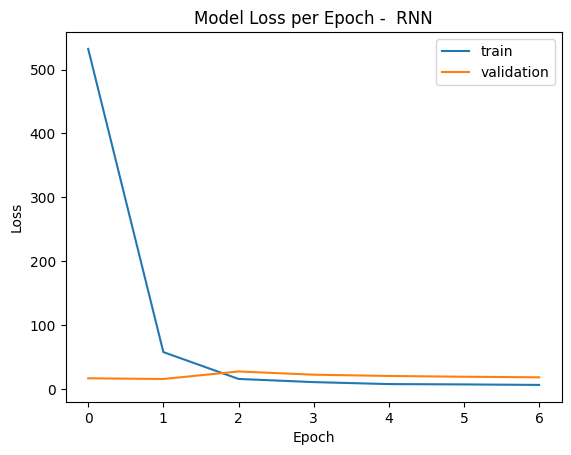

In [42]:
import matplotlib.pyplot as plt

# Plot the training and validation loss per epoch
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss per Epoch -  RNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Then we made predictions for the test set

In [43]:
#make predictions 
y_pred = rnn.predict(x_test)

12/12 [==============================] - 0s 2ms/step


Then we called the **regression_performance** to check the performance of the model

In [44]:
# evaluate performance
print("Results for RNN")
regression_performance(y_test, y_pred)

Results for RNN
R-squared: 0.8943834662562874
RMSE: 4.254275586765829
MAE: 3.3831020239125125


Then we plotted the test and the predicted close price

Text(0.5, 1.0, 'Actual vs Predicted AAPL close price - RNN')

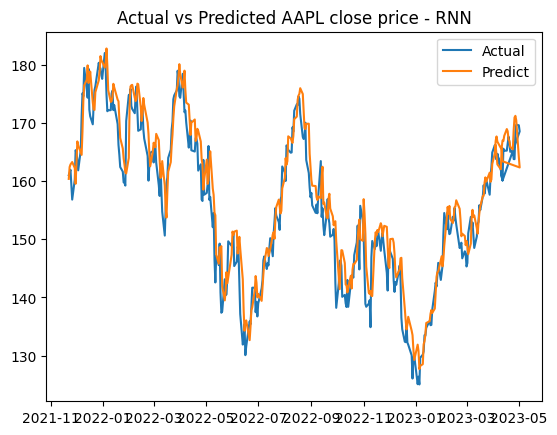

In [45]:
plt.plot(test.index.values[-len(y_test):], y_test, label = "Actual")
plt.plot(test.index.values[-len(y_test):],y_pred, label = "Predict")
plt.legend()
plt.title("Actual vs Predicted AAPL close price - RNN")

## LSTM

In [46]:
# import libraries
import numpy as np
import tensorflow
import keras
import keras_tuner as kt
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.models import Sequential

The function **model_builder** is used for hyperparameter tuning of a LSTM neural network. It takes in a hp parameter which is an instance of keras-tuner.HyperParameters class.

+ The function first tunes the layer weight initialization by selecting an integer value between 1 to 360 using hp.Int() function. Then, it sets the seed for the random number generator to ensure reproducibility.

+ Next, the function tunes the number of neurons in the input and hidden state by selecting integer values between 7 to 30 for the first hidden state (hp_units_1) and 5 to 25 for the second hidden state (hp_units_2) using hp.Int() function.

+ The function also tunes the drop-out rate using hp.Choice() function which allows selecting one of the predefined values.

+ Then, it tunes the activation function by selecting one of the three activation functions (relu, tanh, selu) using hp.Choice() function.

+ After that, the function constructs the LSTM model using the hyperparameters that were tuned in the previous steps. It adds two LSTM layers with the number of units and activation functions specified by hp_units_1, hp_units_2 and hp_actv respectively. It also adds a dropout layer with the dropout rate specified by hp_dropout and a dense layer with one output.

+ Then, the function tunes the optimization function by selecting one of the four optimization functions (RMSProp, Adam, SGD, ADAMAX) using hp.Choice() function. It compiles the model with the selected optimization function, loss function (mse), and metric (mse). The function then returns the compiled model.

In [47]:
# function for hyperparameter tuning
def model_builder(hp):
    
    #tune layer weight initialization
    hp_weights = hp.Int('wt', min_value=1, max_value=360, step=1)
    np.random.seed(hp_weights)
    tensorflow.random.set_seed(hp_weights)  
    model = keras.Sequential()
    
    # Tune the number of neurons in the input and hidden state
    hp_units_1 = hp.Int('units1', min_value=7, max_value=30, step = 1)
    hp_units_2 = hp.Int('units2', min_value=5, max_value=25,step=1)
    
    # Tune the drop out rate
    hp_dropout = hp.Choice('do', values=[0.05, 0.1, 0.2, 0.001, 0.0001, 0.00001])
    
    # Tune activation function
    hp_actv = hp.Choice('actv_type', ['relu', 'tanh', 'selu'])
    
    # model
    model.add(LSTM(hp_units_1, activation= hp_actv, return_sequences=True))
    model.add(Dropout(hp_dropout))
    model.add(LSTM(hp_units_2, activation= hp_actv))
    model.add(Dense(1))
    
    # Tune optimization function
    hp_op = hp.Choice('op',['RMSProp', 'Adam', 'SGD', 'ADAMAX'] )
    model.compile(optimizer= hp_op,
                  loss='mse',
                  metrics='mse')

    return model

The function **model** defines a model that is built using the best hyperparameters found during the tuning process. It sets the weights initialization seed to the best value obtained during hyperparameter tuning. It then builds a Sequential model with two LSTM layers and one Dense layer. The number of neurons in the input and hidden state of the LSTM layers are set to the best values found during hyperparameter tuning. The activation function of the LSTM layers is set to the best activation function found during hyperparameter tuning. A dropout layer is added to prevent overfitting, and its dropout rate is set to the best value found during hyperparameter tuning. The optimizer for compiling the model is set to the best optimization function found during hyperparameter tuning. The loss function is set to mean squared error (mse), and the metrics for evaluating the model are also set to mean squared error.

In [48]:
# function for tuned model for train and test
def model():
    
    # weights initialization
    np.random.seed(best_hps.get('wt'))
    tensorflow.random.set_seed(best_hps.get('wt'))
    
    # model
    model = keras.Sequential()
    model.add(LSTM(best_hps.get('units1'), activation= best_hps.get('actv_type'), return_sequences=True))
    model.add(Dropout(best_hps.get('do')))
    model.add(LSTM(best_hps.get('units2'), activation= best_hps.get('actv_type')))
    model.add(Dense(1))

    # compile model
    model.compile(optimizer= best_hps.get('op'),
                  loss='mse',
                  metrics='mse')

    return model


The function **prepare_data** takes in the data, lookback window size, and future window size as input parameters.

+ First, the data is reshaped into a 2D array of shape (-1, 1), where -1 means the number of rows is inferred from the size of the input data and 1 represents the number of columns.

+ Then, the function generates the input and output sequences for the LSTM model by looping over the range from lookback to the length of the data minus future plus one. Within this loop, the function appends data[i - lookback: i, :] to X_ and data[i: i + future, 0] to Y_, where data[i - lookback: i, :] represents the input sequence of length lookback and data[i: i + future, 0] represents the output sequence of length future.

+ Then, the function converts X_ and Y_ to numpy arrays and returns them as output. Overall, this function is used to prepare the data for training and testing an LSTM model.

In [49]:
# function to prepare train and test data
def prepare_data(data, lookback, future):
 
    data = data.values.reshape(-1,1)
    # generate the input and output sequences
    X_ = []
    Y_ = []

    for i in range(lookback, len(data) - future + 1):
        X_.append(data[i - lookback: i, :])
        Y_.append(data[i: i + future, 0])

    X_ = np.array(X_)
    Y_ = np.array(Y_)
    
    return X_, Y_


In [50]:
# early stop callback to monitor overfit
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

The function **regression_performance()** takes in two arguments, y_test and y_pred, which are the true values and predicted values of the target variable, respectively. It then calculates several performance metrics for regression tasks, including R-squared, Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).

+ R-squared is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variable(s). It ranges from 0 to 1, with higher values indicating better model performance.

+ RMSE is the square root of the MSE, which represents the standard deviation of the residuals, or prediction errors.

+ MAE measures the average absolute difference between the predicted and true values.

Then, the function prints out the values of each of these performance metrics.

In [51]:
# function for performance evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def regression_performance(y_test, y_pred):
    """
    Calculates several regression performance measures and prints the results.
    """
    # Calculate R-squared
    rsq = r2_score(y_test, y_pred)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mse)

    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)

    # Print results
    print('R-squared:', rsq)
    print('RMSE:', rmse)
    print('MAE:', mae)


The close price is divided into train and test subsets (80/20)

In [52]:
# train test split
train = close.iloc[:int(0.8*len(close)),:]
test = close.iloc[int(0.8*len(close)):,:]

#prepare train and test data
x_train, y_train = prepare_data(train['Close'],2 ,1)
x_test, y_test = prepare_data(test['Close'],2 ,1)

Then we used Keras Tuner package to perform hyperparameter tuning using random search.

+ First, an instance of the RandomSearch class is created by providing it the model_builder function as the search space for hyperparameters, the objective to be optimized (val_mse - validation mean squared error), and max_trials (maximum number of hyperparameter combinations to try).

+ Then, the search() method of the tuner object is called with the training data (x_train, y_train), the number of epochs to train the models for (epochs), the proportion of the data to use for validation (validation_split), and a callback (stop_early) that stops the training of a model if its performance on the validation set does not improve for a certain number of epochs.

+ The max_trials parameter is set to 15, which means that the tuner will try out 15 different combinations of hyperparameters. The search() method is called for 40 epochs, which means that each combination of hyperparameters is trained for 40 epochs before evaluating its performance on the validation set.

In [53]:
# keras tuner - random search
tuner = kt.RandomSearch(model_builder,
                  objective='val_mse',
                  overwrite=True,
                  max_trials = 15,
                  seed=42)

# hyperparameter tuning
tuner.search(x_train, y_train, epochs =  40, validation_split=0.3, callbacks=[stop_early])

Trial 15 Complete [00h 00m 25s]
val_mse: 7703.82568359375

Best val_mse So Far: 7.626551151275635
Total elapsed time: 00h 04m 09s


Then we printed the best hyper parameters

In [54]:
# best hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print('Best Hyper Parameters\n')
print('Layer 1 neuron:')
print(best_hps.get('units1'))
print('\nLayer 2 neuron:')
print(best_hps.get('units2'))
print('\nOptimization Function:')
print(best_hps.get('op'))
print('\nActivation Function:')
print(best_hps.get('actv_type'))
print('\nSeed for weight initialization:')
print(best_hps.get('wt'))
print('\nDropout rate:')
print(best_hps.get('do'))


Best Hyper Parameters

Layer 1 neuron:
10

Layer 2 neuron:
10

Optimization Function:
Adam

Activation Function:
relu

Seed for weight initialization:
294

Dropout rate:
0.001


Then we fit the model with shortlisted hyperparameters on the train data

In [55]:
# make an instance of the model
lstm = model()

# train a model with tuned hyper parameters
history = lstm.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=40 , verbose=2, shuffle=False, callbacks=[stop_early])

Epoch 1/40
47/47 - 4s - loss: 5686.7910 - mse: 5686.7910 - val_loss: 24352.3535 - val_mse: 24352.3535 - 4s/epoch - 79ms/step
Epoch 2/40
47/47 - 0s - loss: 5678.3281 - mse: 5678.3281 - val_loss: 24331.6797 - val_mse: 24331.6797 - 280ms/epoch - 6ms/step
Epoch 3/40
47/47 - 0s - loss: 4312.3154 - mse: 4312.3154 - val_loss: 14765.5840 - val_mse: 14765.5840 - 233ms/epoch - 5ms/step
Epoch 4/40
47/47 - 0s - loss: 353.8317 - mse: 353.8317 - val_loss: 135.2079 - val_mse: 135.2079 - 233ms/epoch - 5ms/step
Epoch 5/40
47/47 - 0s - loss: 13.2618 - mse: 13.2618 - val_loss: 16.1455 - val_mse: 16.1455 - 285ms/epoch - 6ms/step
Epoch 6/40
47/47 - 0s - loss: 10.6013 - mse: 10.6013 - val_loss: 15.7680 - val_mse: 15.7680 - 281ms/epoch - 6ms/step
Epoch 7/40
47/47 - 0s - loss: 7.4966 - mse: 7.4966 - val_loss: 16.0451 - val_mse: 16.0451 - 243ms/epoch - 5ms/step
Epoch 8/40
47/47 - 0s - loss: 6.3761 - mse: 6.3761 - val_loss: 16.2288 - val_mse: 16.2288 - 246ms/epoch - 5ms/step
Epoch 9/40
47/47 - 0s - loss: 5.8075

Then we plotted the train and validation losses per number of epoch

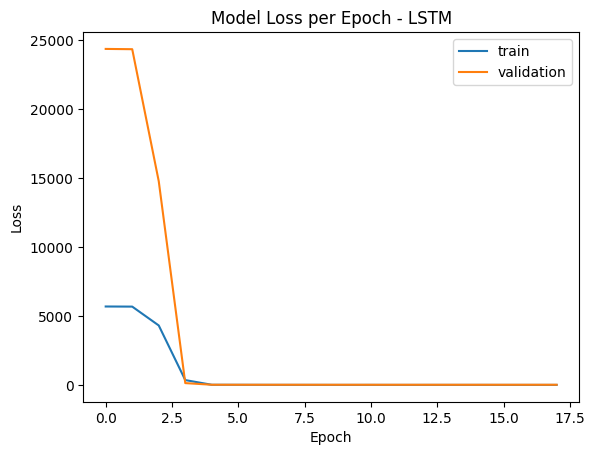

In [56]:
import matplotlib.pyplot as plt

# Plot the training and validation loss per epoch
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss per Epoch - LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Then we made predictions for the test set

In [57]:
#make predictions 
y_pred = lstm.predict(x_test)

12/12 [==============================] - 0s 2ms/step


Then we called the **regression_performance** to check the performance of the model

In [58]:
# evaluate performance
print("Results for LSTM")
regression_performance(y_test, y_pred)

Results for LSTM
R-squared: 0.9090293031014828
RMSE: 3.9483025589903393
MAE: 3.168018391650656


Then we plotted the test and the predicted close price

Text(0.5, 1.0, 'Actual vs Predicted AAPL close price - LSTM')

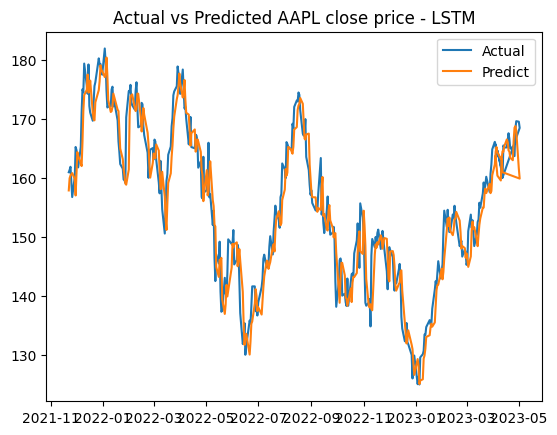

In [59]:
plt.plot(test.index.values[-len(y_test):], y_test, label = "Actual")
plt.plot(test.index.values[-len(y_test):],y_pred, label = "Predict")
plt.legend()
plt.title("Actual vs Predicted AAPL close price - LSTM")

# Analysis 1


Based on the results, it seems that the LSTM model outperformed the RNN model in predicting AAPL close price.

+ The R-squared value for the LSTM model (0.909) was higher than that of the RNN model (0.894), indicating that the LSTM model was better at explaining the variance in the data.
+ Additionally, the RMSE and MAE values for the LSTM model (3.948 and 3.168) were lower than those of the RNN model (4.254 and 3.383), suggesting that the LSTM model had smaller prediction errors and was therefore more accurate.

The hypothesis that the LSTM model would outperform the RNN model due to its ability to learn long-term dependencies and handle vanishing gradients more effectively seems to be supported by the results. The LSTM architecture is designed to better capture long-term dependencies and avoid the vanishing gradient problem that can occur in RNNs, so it makes sense that the LSTM model would be better suited for this type of time-series forecasting task.

# Adding more data

Now considering over 20 years of data to see if the performance improves

In [70]:
import yfinance as yf
import pandas as pd

# Define the time periods
start = "2000-01-01"
end = datetime.today()

In [71]:
# Download the AAPL data for the first period
new_data = yf.download("AAPL", start=start, end=end)

new_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.850644,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.778926,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.790324,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.721931,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.756128,460734400


In [72]:
new_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-26,163.059998,165.279999,162.800003,163.759995,163.759995,45498800
2023-04-27,165.190002,168.559998,165.190002,168.410004,168.410004,64902300
2023-04-28,168.490005,169.850006,167.880005,169.679993,169.679993,55209200
2023-05-01,169.279999,170.449997,168.639999,169.589996,169.589996,52472900
2023-05-02,170.089996,170.350006,167.539993,168.539993,168.539993,48329100


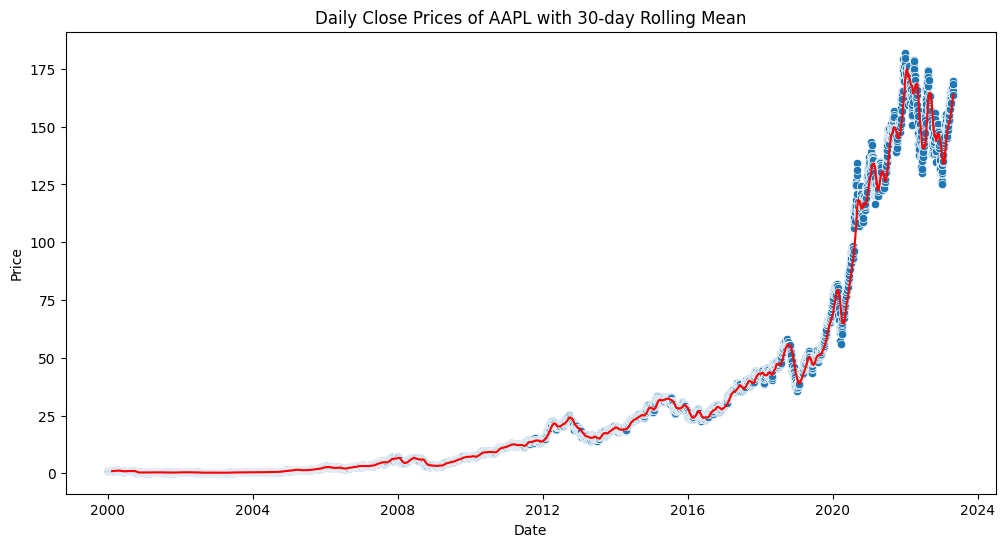

In [73]:
# Create a scatter plot of the daily close prices with a rolling mean
rolling_mean = new_data['Close'].rolling(window=30).mean()
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=new_data['Close'], ax=ax)
sns.lineplot(data=rolling_mean, ax=ax, color='red')
ax.set_title('Daily Close Prices of AAPL with 30-day Rolling Mean')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()

Since the code for the RNN and LSTM is following the same approach as in the previous section so we are not commenting the code to make it look concise.

## RNN

In [74]:
# function for hyperparameter tuning
def model_builder(hp):
    
    #tune layer weight initialization
    hp_weights = hp.Int('wt', min_value=1, max_value=360, step=1)
    np.random.seed(hp_weights)
    tensorflow.random.set_seed(hp_weights)  
    model = keras.Sequential()
    
    # Tune the number of neurons in the input and hidden state
    hp_units_1 = hp.Int('units1', min_value=7, max_value=30, step = 1)
    hp_units_2 = hp.Int('units2', min_value=5, max_value=25,step=1)
    
    # Tune the drop out rate
    hp_dropout = hp.Choice('do', values=[0.05, 0.1, 0.2, 0.001, 0.0001, 0.00001])
    
    # Tune activation function
    hp_actv = hp.Choice('actv_type', ['relu', 'tanh', 'selu'])
    
    # model
    model.add(SimpleRNN(hp_units_1, activation= hp_actv, return_sequences=True))
    model.add(Dropout(hp_dropout))
    model.add(SimpleRNN(hp_units_2, activation= hp_actv))
    model.add(Dense(1))
    
    # Tune optimization function
    hp_op = hp.Choice('op',['RMSProp', 'Adam', 'SGD', 'ADAMAX'] )
    model.compile(optimizer= hp_op,
                  loss='mse',
                  metrics='mse')

    return model

In [75]:
# function for tuned model for train and test
def model():
    
    # weights initialization
    np.random.seed(best_hps.get('wt'))
    tensorflow.random.set_seed(best_hps.get('wt'))
    
    # model
    model = keras.Sequential()
    model.add(SimpleRNN(best_hps.get('units1'), activation= best_hps.get('actv_type'), return_sequences=True))
    model.add(Dropout(best_hps.get('do')))
    model.add(SimpleRNN(best_hps.get('units2'), activation= best_hps.get('actv_type')))
    model.add(Dense(1))

    # compile model
    model.compile(optimizer= best_hps.get('op'),
                  loss='mse',
                  metrics='mse')

    return model


In [76]:
# function to prepare train and test data
def prepare_data(data, lookback, future):
 
    data = data.values.reshape(-1,1)
    # generate the input and output sequences
    X_ = []
    Y_ = []

    for i in range(lookback, len(data) - future + 1):
        X_.append(data[i - lookback: i, :])
        Y_.append(data[i: i + future, 0])

    X_ = np.array(X_)
    Y_ = np.array(Y_)
    
    return X_, Y_


In [77]:
# early stop callback to monitor overfit
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [78]:
# function for performance evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def regression_performance(y_test, y_pred):
    """
    Calculates several regression performance measures and prints the results.
    """
    # Calculate R-squared
    rsq = r2_score(y_test, y_pred)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mse)

    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)

    # Print results
    print('R-squared:', rsq)
    print('RMSE:', rmse)
    print('MAE:', mae)


In [79]:
# train test split
train = new_data.iloc[:int(0.8*len(new_data)),:]
test = new_data.iloc[int(0.8*len(new_data)):,:]

#prepare train and test data
x_train, y_train = prepare_data(train['Close'],2 ,1)
x_test, y_test = prepare_data(test['Close'],2 ,1)

In [80]:
# keras tuner - random search
tuner = kt.RandomSearch(model_builder,
                  objective='val_mse',
                  overwrite=True,
                  max_trials = 15,
                  seed=42)

# hyperparameter tuning
tuner.search(x_train, y_train, epochs =  40, validation_split=0.3, callbacks=[stop_early])

Trial 15 Complete [00h 00m 44s]
val_mse: 103.96764373779297

Best val_mse So Far: 0.23416921496391296
Total elapsed time: 00h 06m 19s


In [81]:
# best hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print('Best Hyper Parameters\n')
print('Layer 1 neuron:')
print(best_hps.get('units1'))
print('\nLayer 2 neuron:')
print(best_hps.get('units2'))
print('\nOptimization Function:')
print(best_hps.get('op'))
print('\nActivation Function:')
print(best_hps.get('actv_type'))
print('\nSeed for weight initialization:')
print(best_hps.get('wt'))
print('\nDropout rate:')
print(best_hps.get('do'))


Best Hyper Parameters

Layer 1 neuron:
10

Layer 2 neuron:
10

Optimization Function:
Adam

Activation Function:
relu

Seed for weight initialization:
294

Dropout rate:
0.001


In [82]:
# make an instance of the model
rnn = model()

# train a model with tuned hyper parameters
history = rnn.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=40 , verbose=2, shuffle=False, callbacks=[stop_early])

Epoch 1/40
147/147 - 3s - loss: 0.5134 - mse: 0.5134 - val_loss: 5.9703 - val_mse: 5.9703 - 3s/epoch - 21ms/step
Epoch 2/40
147/147 - 1s - loss: 1.6250 - mse: 1.6250 - val_loss: 7.8810 - val_mse: 7.8810 - 558ms/epoch - 4ms/step
Epoch 3/40
147/147 - 1s - loss: 0.1341 - mse: 0.1341 - val_loss: 6.5308 - val_mse: 6.5308 - 570ms/epoch - 4ms/step
Epoch 4/40
147/147 - 1s - loss: 0.5300 - mse: 0.5300 - val_loss: 7.4914 - val_mse: 7.4914 - 532ms/epoch - 4ms/step
Epoch 5/40
147/147 - 1s - loss: 0.4491 - mse: 0.4491 - val_loss: 5.9104 - val_mse: 5.9104 - 529ms/epoch - 4ms/step
Epoch 6/40
147/147 - 1s - loss: 0.1222 - mse: 0.1222 - val_loss: 7.6356 - val_mse: 7.6356 - 549ms/epoch - 4ms/step
Epoch 7/40
147/147 - 1s - loss: 0.3201 - mse: 0.3201 - val_loss: 7.4726 - val_mse: 7.4726 - 556ms/epoch - 4ms/step
Epoch 8/40
147/147 - 1s - loss: 0.1596 - mse: 0.1596 - val_loss: 8.1405 - val_mse: 8.1405 - 571ms/epoch - 4ms/step
Epoch 9/40
147/147 - 1s - loss: 0.2153 - mse: 0.2153 - val_loss: 7.9846 - val_mse:

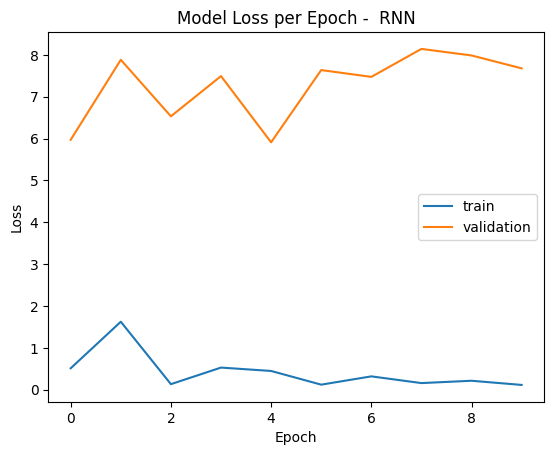

In [83]:
import matplotlib.pyplot as plt

# Plot the training and validation loss per epoch
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss per Epoch -  RNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [84]:
#make predictions 
y_pred = rnn.predict(x_test)

37/37 [==============================] - 0s 2ms/step


In [85]:
# evaluate performance
print("Results for RNN")
regression_performance(y_test, y_pred)

Results for RNN
R-squared: 0.9961453424186347
RMSE: 2.7706499027009834
MAE: 1.975397650292302


Text(0.5, 1.0, 'Actual vs Predicted AAPL close price - RNN')

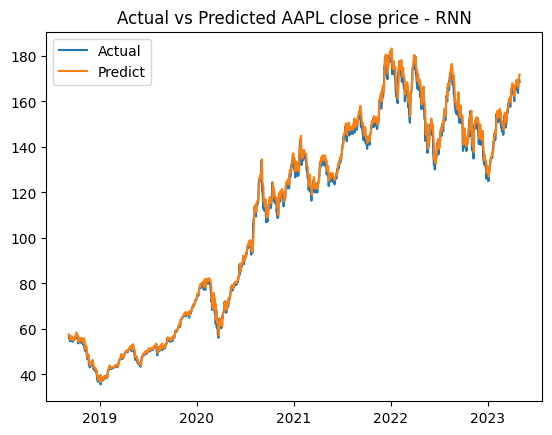

In [86]:
plt.plot(test.index.values[-len(y_test):], y_test, label = "Actual")
plt.plot(test.index.values[-len(y_test):],y_pred, label = "Predict")
plt.legend()
plt.title("Actual vs Predicted AAPL close price - RNN")

## LSTM

In [87]:
# function for hyperparameter tuning
def model_builder(hp):
    
    #tune layer weight initialization
    hp_weights = hp.Int('wt', min_value=1, max_value=360, step=1)
    np.random.seed(hp_weights)
    tensorflow.random.set_seed(hp_weights)  
    model = keras.Sequential()
    
    # Tune the number of neurons in the input and hidden state
    hp_units_1 = hp.Int('units1', min_value=7, max_value=30, step = 1)
    hp_units_2 = hp.Int('units2', min_value=5, max_value=25,step=1)
    
    # Tune the drop out rate
    hp_dropout = hp.Choice('do', values=[0.05, 0.1, 0.2, 0.001, 0.0001, 0.00001])
    
    # Tune activation function
    hp_actv = hp.Choice('actv_type', ['relu', 'tanh', 'selu'])
    
    # model
    model.add(LSTM(hp_units_1, activation= hp_actv, return_sequences=True))
    model.add(Dropout(hp_dropout))
    model.add(LSTM(hp_units_2, activation= hp_actv))
    model.add(Dense(1))
    
    # Tune optimization function
    hp_op = hp.Choice('op',['RMSProp', 'Adam', 'SGD', 'ADAMAX'] )
    model.compile(optimizer= hp_op,
                  loss='mse',
                  metrics='mse')

    return model

In [88]:
# function for tuned model for train and test
def model():
    
    # weights initialization
    np.random.seed(best_hps.get('wt'))
    tensorflow.random.set_seed(best_hps.get('wt'))
    
    # model
    model = keras.Sequential()
    model.add(LSTM(best_hps.get('units1'), activation= best_hps.get('actv_type'), return_sequences=True))
    model.add(Dropout(best_hps.get('do')))
    model.add(LSTM(best_hps.get('units2'), activation= best_hps.get('actv_type')))
    model.add(Dense(1))

    # compile model
    model.compile(optimizer= best_hps.get('op'),
                  loss='mse',
                  metrics='mse')

    return model


In [89]:
# function to prepare train and test data
def prepare_data(data, lookback, future):
 
    data = data.values.reshape(-1,1)
    # generate the input and output sequences
    X_ = []
    Y_ = []

    for i in range(lookback, len(data) - future + 1):
        X_.append(data[i - lookback: i, :])
        Y_.append(data[i: i + future, 0])

    X_ = np.array(X_)
    Y_ = np.array(Y_)
    
    return X_, Y_


In [90]:
# early stop callback to monitor overfit
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [91]:
# function for performance evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def regression_performance(y_test, y_pred):
    """
    Calculates several regression performance measures and prints the results.
    """
    # Calculate R-squared
    rsq = r2_score(y_test, y_pred)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mse)

    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)

    # Print results
    print('R-squared:', rsq)
    print('RMSE:', rmse)
    print('MAE:', mae)


In [92]:
# train test split
train = new_data.iloc[:int(0.8*len(new_data)),:]
test = new_data.iloc[int(0.8*len(new_data)):,:]

#prepare train and test data
x_train, y_train = prepare_data(train['Close'],2 ,1)
x_test, y_test = prepare_data(test['Close'],2 ,1)

In [93]:
# keras tuner - random search
tuner = kt.RandomSearch(model_builder,
                  objective='val_mse',
                  overwrite=True,
                  max_trials = 15,
                  seed=42)

# hyperparameter tuning
tuner.search(x_train, y_train, epochs =  40, validation_split=0.3, callbacks=[stop_early])

Trial 15 Complete [00h 00m 49s]
val_mse: 95.06597137451172

Best val_mse So Far: 0.33610883355140686
Total elapsed time: 00h 08m 17s


In [94]:
# best hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print('Best Hyper Parameters\n')
print('Layer 1 neuron:')
print(best_hps.get('units1'))
print('\nLayer 2 neuron:')
print(best_hps.get('units2'))
print('\nOptimization Function:')
print(best_hps.get('op'))
print('\nActivation Function:')
print(best_hps.get('actv_type'))
print('\nSeed for weight initialization:')
print(best_hps.get('wt'))
print('\nDropout rate:')
print(best_hps.get('do'))


Best Hyper Parameters

Layer 1 neuron:
9

Layer 2 neuron:
15

Optimization Function:
ADAMAX

Activation Function:
selu

Seed for weight initialization:
186

Dropout rate:
0.05


In [95]:
# make an instance of the model
lstm = model()

# train a model with tuned hyper parameters
history = lstm.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=40 , verbose=2, shuffle=False, callbacks=[stop_early])

Epoch 1/40
147/147 - 5s - loss: 260.1794 - mse: 260.1794 - val_loss: 13090.3135 - val_mse: 13090.3135 - 5s/epoch - 31ms/step
Epoch 2/40
147/147 - 1s - loss: 174.4122 - mse: 174.4122 - val_loss: 12012.0020 - val_mse: 12012.0020 - 784ms/epoch - 5ms/step
Epoch 3/40
147/147 - 1s - loss: 85.4152 - mse: 85.4152 - val_loss: 10281.9648 - val_mse: 10281.9648 - 858ms/epoch - 6ms/step
Epoch 4/40
147/147 - 1s - loss: 31.9282 - mse: 31.9282 - val_loss: 7817.9395 - val_mse: 7817.9395 - 885ms/epoch - 6ms/step
Epoch 5/40
147/147 - 1s - loss: 16.2815 - mse: 16.2815 - val_loss: 6461.7295 - val_mse: 6461.7295 - 811ms/epoch - 6ms/step
Epoch 6/40
147/147 - 1s - loss: 8.8114 - mse: 8.8114 - val_loss: 4826.8721 - val_mse: 4826.8721 - 919ms/epoch - 6ms/step
Epoch 7/40
147/147 - 1s - loss: 6.1469 - mse: 6.1469 - val_loss: 3469.5603 - val_mse: 3469.5603 - 1s/epoch - 8ms/step
Epoch 8/40
147/147 - 1s - loss: 4.6772 - mse: 4.6772 - val_loss: 2304.9841 - val_mse: 2304.9841 - 1s/epoch - 8ms/step
Epoch 9/40
147/147 -

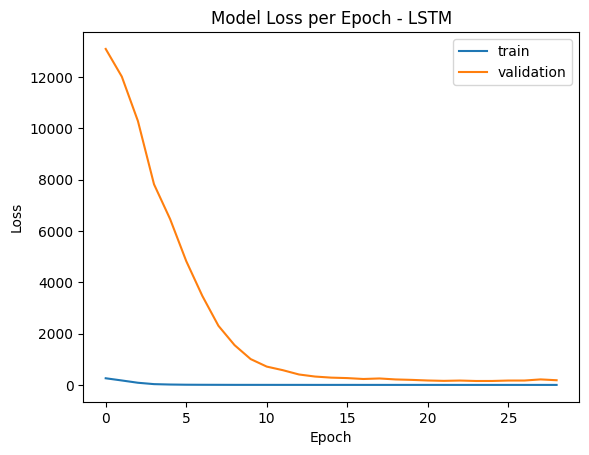

In [96]:
import matplotlib.pyplot as plt

# Plot the training and validation loss per epoch
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss per Epoch - LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [97]:
#make predictions 
y_pred = lstm.predict(x_test)

37/37 [==============================] - 0s 3ms/step


In [98]:
# evaluate performance
print("Results for LSTM")
regression_performance(y_test, y_pred)

Results for LSTM
R-squared: 0.9078611907661359
RMSE: 13.545968065750872
MAE: 10.755558817866719


Text(0.5, 1.0, 'Actual vs Predicted AAPL close price - LSTM')

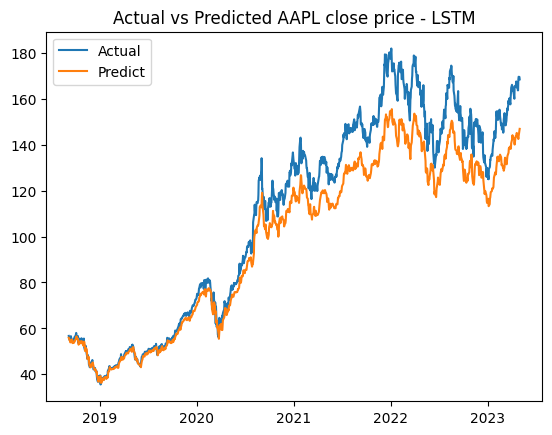

In [99]:
plt.plot(test.index.values[-len(y_test):], y_test, label = "Actual")
plt.plot(test.index.values[-len(y_test):],y_pred, label = "Predict")
plt.legend()
plt.title("Actual vs Predicted AAPL close price - LSTM")

# Analysis 2
Based on the new results, the hypothesis that adding more data improves the performance of both RNN and LSTM appears to be supported. The R-squared values for RNN has increased significantly while that of LSTM remained constant, indicating a better fit to the data. The RMSE and MAE values have also decreased, indicating a reduction in the prediction errors.
